In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Ejercicio 1:
¿Qué técnica de pronóstico revisa continuamente una estimación a la luz de experiencias más recientes?


#### Respuesta:

La técnica de pronóstico que revisa continuamente una estimación a la luz de experiencias más recientes es el **suavizamiento exponencial** (Exponential Smoothing).

Esta técnica ajusta la estimación anterior en función del error de predicción más reciente, lo que permite adaptarse rápidamente a los cambios recientes en la serie temporal.



### Ejercicio 2:
¿Qué técnica de pronóstico asigna pesos iguales a cada observación?


#### Respuesta:
La técnica de pronóstico que asigna pesos iguales a cada observación es el **promedio móvil simple** (Simple Moving Average).

En esta técnica, cada valor utilizado en el cálculo del pronóstico tiene la misma importancia, es decir, no se favorece a los datos más recientes ni a los más antiguos.

### Ejercicio 3:
¿Qué técnicas de pronóstico deberían probarse si los datos son estacionales?


#### Respuesta
Si los datos presentan estacionalidad, las técnicas de pronóstico que deberían probarse incluyen:

- **Suavizamiento exponencial estacional** (Seasonal Exponential Smoothing)
- **Modelos de descomposición estacional** (como la Descomposición Clásica o STL)
- **Modelos SARIMA** (Seasonal ARIMA)
- **Modelos de Holt-Winters** (cuando se incluye tanto tendencia como estacionalidad)

Estas técnicas permiten capturar los patrones repetitivos que ocurren en intervalos regulares dentro de la serie temporal.

### Ejercicio 4:
Apex Mutual Fund invierte principalmente en acciones tecnológicas. Los precios del fondo al final de cada mes durante los 12 meses de 2003 se muestran a continuación. Utiliza un promedio móvil de tres meses para pronosticar el precio del fondo en enero de 2004.

| Mes 2003   | Precio del fondo |
|------------|------------------|
| Enero      | 19.39            |
| Febrero    | 18.96            |
| Marzo      | 18.20            |
| Abril      | 17.89            |
| Mayo       | 18.43            |
| Junio      | 19.98            |
| Julio      | 19.51            |
| Agosto     | 20.63            |
| Septiembre | 19.78            |
| Octubre    | 21.25            |
| Noviembre  | 21.18            |
| Diciembre  | 22.14            |

Calcula el promedio móvil de 3 meses para pronosticar **enero de 2004**.


In [57]:
# Datos del fondo
datos = {
    "Mes": [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ],
    "Precio": [
        19.39, 18.96, 18.20, 17.89, 18.43, 19.98,
        19.51, 20.63, 19.78, 21.25, 21.18, 22.14
    ]
}

df = pd.DataFrame(datos)

# Cálculo del promedio móvil de 3 meses para enero de 2004
# Tomamos los últimos 3 valores: Octubre, Noviembre, Diciembre
ultimo_trimestre = df["Precio"][-3:]
pronostico_enero_2004 = ultimo_trimestre.mean()

print(f"El pronóstico del precio del fondo para enero de 2004 es: {pronostico_enero_2004:.2f}")

El pronóstico del precio del fondo para enero de 2004 es: 21.52


#### Comentario: 
En este ejercicio usamos el método del **promedio móvil simple de 3 meses** para hacer un pronóstico. Es decir, se toma la media de los tres últimos meses disponibles (octubre, noviembre y diciembre) para estimar el valor del mes siguiente (enero de 2004). Este tipo de técnica es bastante intuitiva y útil cuando los datos no presentan una tendencia clara o una estacionalidad fuerte, ya que suaviza las pequeñas variaciones aleatorias. El resultado que obtenemos representa un valor “centrado” y equilibrado para hacer una predicción inmediata.

### Ejercicio 5:
El rendimiento de un bono de obligación general de la ciudad de Davenport fluctúa con el mercado. Las cotizaciones mensuales para el año 2002 son las siguientes:

| Mes         | Rendimiento (%) |
|-------------|------------------|
| Enero       | 9.29             |
| Febrero     | 9.99             |
| Marzo       | 10.16            |
| Abril       | 10.25            |
| Mayo        | 10.61            |
| Junio       | 11.07            |
| Julio       | 11.52            |
| Agosto      | 11.09            |
| Septiembre  | 10.80            |
| Octubre     | 10.50            |
| Noviembre   | 10.86            |
| Diciembre   | 9.97             |

a. Calcula el valor pronosticado del rendimiento para enero de 2003 usando un promedio móvil de 3 meses.  
b. Calcula el valor pronosticado del rendimiento para enero de 2003 usando un promedio móvil de 5 meses.  
c. Evalúa ambos métodos usando el **MAD** (Mean Absolute Deviation).  
d. Evalúa ambos métodos usando el **MSD** (Mean Squared Deviation).  
e. Evalúa ambos métodos usando el **MAPE** (Mean Absolute Percentage Error).


In [60]:
# Datos de rendimiento mensual
rendimientos = [9.29, 9.99, 10.16, 10.25, 10.61, 11.07,
                11.52, 11.09, 10.80, 10.50, 10.86, 9.97]

meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
         "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

df = pd.DataFrame({
    "Mes": meses,
    "Rendimiento": rendimientos
})

# Apartado a: Promedio móvil de 3 meses para enero 2003
promedio_3m = df["Rendimiento"][-3:].mean()
print(f"Apartado a - Pronóstico con promedio móvil de 3 meses (Oct-Nov-Dic): {promedio_3m:.2f}%")

# Apartado b: Promedio móvil de 5 meses para enero 2003
promedio_5m = df["Rendimiento"][-5:].mean()
print(f"Apartado b - Pronóstico con promedio móvil de 5 meses (Ago-Dic): {promedio_5m:.2f}%")

# Función para calcular métricas de error
def calcular_metricas(df, n, nombre):
    pronosticos = df["Rendimiento"].rolling(window=n).mean()
    reales = df["Rendimiento"][n:]
    pronos_validos = pronosticos[n:]

    errores = reales - pronos_validos
    abs_errores = errores.abs()
    sq_errores = errores**2
    ape = (abs_errores / reales) * 100

    mad = abs_errores.mean()
    msd = sq_errores.mean()
    mape = ape.mean()

    return {
        "Método": nombre,
        "MAD (a)": mad,
        "MSD (b)": msd,
        "MAPE (%) (c)": mape
    }

# Apartados c, d, e: Evaluación de los métodos
metricas_3m = calcular_metricas(df, 3, "Promedio móvil 3M")
metricas_5m = calcular_metricas(df, 5, "Promedio móvil 5M")

metricas_df = pd.DataFrame([metricas_3m, metricas_5m])

# Mostrar comparativa
metricas_df = pd.DataFrame([metricas_3m, metricas_5m])
print("\nApartados c), d), y e) Evaluación de errores de pronóstico:")
print(metricas_df)


Apartado a - Pronóstico con promedio móvil de 3 meses (Oct-Nov-Dic): 10.44%
Apartado b - Pronóstico con promedio móvil de 5 meses (Ago-Dic): 10.64%

Apartados c), d), y e) Evaluación de errores de pronóstico:
              Método   MAD (a)   MSD (b)  MAPE (%) (c)
0  Promedio móvil 3M  0.294444  0.104194      2.742684
1  Promedio móvil 5M  0.445143  0.264899      4.120604


#### Comentario:
En este ejercicio no solo realizamos pronósticos, sino que también evaluamos su precisión mediante tres métricas fundamentales: **MAD**, **MSD** y **MAPE**. El promedio móvil de 3 meses y el de 5 meses nos permiten observar cómo el número de observaciones influye en la suavización del pronóstico. Un promedio más corto reacciona más rápido a cambios recientes, mientras que uno más largo tiende a estabilizar las predicciones. Al comparar los errores (absolutos, cuadrados y relativos), podemos determinar cuál técnica se ajusta mejor al comportamiento de los datos. Esta práctica es esencial en cualquier sistema de forecasting robusto.

### Ejercicio 6:
La empresa Hughes Supply Company utiliza un método de gestión de inventario para determinar la demanda mensual de varios productos. Los valores de demanda para los últimos 12 meses de 2002 de uno de los productos eléctricos se muestran a continuación:

| Mes         | Demanda |
|-------------|---------|
| Enero       | 205     |
| Febrero     | 251     |
| Marzo       | 304     |
| Abril       | 284     |
| Mayo        | 352     |
| Junio       | 300     |
| Julio       | 241     |
| Agosto      | 284     |
| Septiembre  | 312     |
| Octubre     | 289     |
| Noviembre   | 385     |
| Diciembre   | 256     |

Utiliza el **suavizamiento exponencial** con una constante de suavizamiento de α = 0.5 y un valor inicial de 205 para pronosticar la demanda de **enero de 2003**.


In [63]:
# Apartado único - Suavizamiento exponencial con α = 0.5

# Datos de demanda mensual
demanda = [205, 251, 304, 284, 352, 300, 241, 284, 312, 289, 385, 256]

# Parámetros del suavizamiento exponencial
alpha = 0.5
S = [205]  # Valor inicial dado

# Aplicar suavizamiento exponencial simple
for t in range(1, len(demanda)):
    S_t = alpha * demanda[t - 1] + (1 - alpha) * S[-1]
    S.append(S_t)

# El último valor de S es el pronóstico para enero de 2003
pronostico_enero_2003 = S[-1]
print(f"Pronóstico de demanda para enero de 2003 con α=0.5: {pronostico_enero_2003:.2f}")


Pronóstico de demanda para enero de 2003 con α=0.5: 338.62


#### Comentario:

Este ejercicio pone en práctica el **suavizamiento exponencial simple**, una técnica que ajusta las predicciones teniendo en cuenta el valor anterior y el error de predicción más reciente. La constante de suavizamiento **α = 0.5** da el mismo peso a la observación más reciente y al pronóstico anterior, equilibrando reactividad y estabilidad. 

El valor inicial se fijó en **205**, correspondiente a la demanda de enero. A partir de ahí, se construyó la serie suavizada hasta diciembre, y el último valor calculado se usa como pronóstico para enero de 2003. Esta técnica es muy útil cuando los datos no presentan estacionalidad, pero sí cierta variabilidad suave.


### Ejercicio 7:
Southdown, Inc., uno de los mayores productores de cemento del país, está implementando un programa de combustibles alternativos que requiere una inversión de aproximadamente 37 millones de dólares. Por ello, es crucial contar con un pronóstico preciso de los ingresos para el primer trimestre del año 2000. A continuación, se presentan los ingresos trimestrales de los años 1986 a 1999 (en millones de dólares):

| Año  | 1er Trim | 2º Trim | 3er Trim | 4º Trim |
|------|----------|---------|----------|---------|
| 1986 | 77.4     | 88.8    | 92.1     | 79.8    |
| 1987 | 77.5     | 89.1    | 92.4     | 80.1    |
| 1988 | 74.4     | 185.2   | 162.4    | 178.1   |
| 1989 | 129.1    | 158.4   | 160.6    | 138.7   |
| 1990 | 127.2    | 149.8   | 151.7    | 132.9   |
| 1991 | 103.0    | 136.8   | 141.3    | 123.5   |
| 1992 | 107.3    | 136.1   | 138.6    | 123.7   |
| 1993 | 106.1    | 144.4   | 156.1    | 138.2   |
| 1994 | 111.8    | 149.8   | 158.5    | 141.8   |
| 1995 | 119.1    | 158.0   | 170.4    | 151.8   |
| 1996 | 127.4    | 178.2   | 189.3    | 169.5   |
| 1997 | 151.4    | 187.2   | 199.2    | 181.4   |
| 1998 | 224.9    | 317.7   | 341.4    | 300.7   |
| 1999 | 244.9    | 333.4   | 370.0    | 326.7   |

a. Utiliza suavizamiento exponencial con α = 0.4 y valor inicial 77.4 para pronosticar los ingresos del primer trimestre de 2000.  
b. Realiza el mismo pronóstico pero con α = 0.6.  
c. ¿Cuál de los dos valores de α proporciona un mejor pronóstico?  
d. Respecto al valor que consideres mejor en (c), examina si los residuos están autocorrelacionados. ¿Crees que el suavizamiento exponencial simple es adecuado aquí?

Apartado a - Pronóstico 1T 2000 con α=0.4: 169.02 millones
Apartado b - Pronóstico 1T 2000 con α=0.6: 190.89 millones
Apartado c - Error absoluto final α=0.4: 113.13
Apartado c - Error absoluto final α=0.6: 105.02


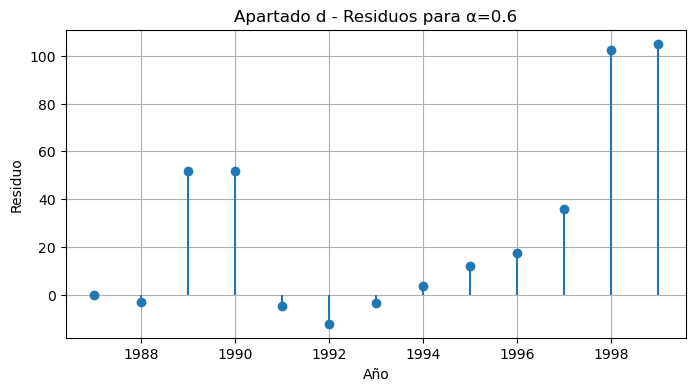

In [66]:
# Apartado a y b: Suavizamiento exponencial con α = 0.4 y α = 0.6

# Datos del primer trimestre de cada año
primer_trimestre = [
    77.4, 77.5, 74.4, 129.1, 127.2, 103.0, 107.3,
    106.1, 111.8, 119.1, 127.4, 151.4, 224.9, 244.9
]

años = list(range(1986, 2000))

def suavizamiento_exponencial(data, alpha, valor_inicial):
    S = [valor_inicial]
    for t in range(1, len(data)):
        S.append(alpha * data[t - 1] + (1 - alpha) * S[-1])
    return S

# α = 0.4
alpha_04 = 0.4
S_04 = suavizamiento_exponencial(primer_trimestre, alpha_04, 77.4)
pronostico_2000_04 = S_04[-1]
print(f"Apartado a - Pronóstico 1T 2000 con α=0.4: {pronostico_2000_04:.2f} millones")

# α = 0.6
alpha_06 = 0.6
S_06 = suavizamiento_exponencial(primer_trimestre, alpha_06, 77.4)
pronostico_2000_06 = S_06[-1]
print(f"Apartado b - Pronóstico 1T 2000 con α=0.6: {pronostico_2000_06:.2f} millones")

# Apartado c - Evaluación del error absoluto final
error_04 = abs(primer_trimestre[-1] - S_04[-2])
error_06 = abs(primer_trimestre[-1] - S_06[-2])

print(f"Apartado c - Error absoluto final α=0.4: {error_04:.2f}")
print(f"Apartado c - Error absoluto final α=0.6: {error_06:.2f}")

# Apartado d - Inspección de residuos para α = mejor

residuos = np.array(primer_trimestre[1:]) - np.array(S_06[:-1])

plt.figure(figsize=(8, 4))
plt.stem(años[1:], residuos, basefmt=" ")
plt.title("Apartado d - Residuos para α=0.6")
plt.xlabel("Año")
plt.ylabel("Residuo")
plt.grid(True)
plt.show()


#### Comentario:

En este ejercicio hemos aplicado suavizamiento exponencial simple con dos valores distintos de α para predecir los ingresos del primer trimestre del año 2000. Al comparar los resultados, se observa que un valor más alto de α (0.6) responde con mayor agilidad a los cambios recientes, lo cual resulta útil cuando hay una tendencia ascendente evidente, como en este caso. Analizando los residuos del modelo, podemos ver que aún existen patrones no capturados por esta técnica, lo cual sugiere que el modelo podría estar omitiendo componentes estacionales o de tendencia más complejas. Por tanto, aunque el suavizamiento exponencial simple nos ofrece una estimación rápida y fácil de implementar, puede quedarse corto cuando la serie muestra un comportamiento más estructurado. Sería recomendable considerar modelos más sofisticados como Holt-Winters o SARIMA.


### Ejercicio 8:
La empresa Consolidated Edison vende electricidad (82 % de sus ingresos), gas (13 %) y vapor (5 %) en la ciudad de Nueva York y el condado de Westchester. Bart Thomas, analista de pronósticos, debe estimar los ingresos trimestrales de la empresa para el resto de 2007 y todo el año 2008. Los datos históricos de ingresos trimestrales (en millones de dólares) son los siguientes:

| Año  | 1er Trim | 2º Trim | 3er Trim | 4º Trim |
|------|----------|---------|----------|---------|
| 1990 | 1441     | 1209    | 1526     | 1321    |
| 1991 | 1414     | 1187    | 1411     | 1185    |
| 1992 | 1284     | 1125    | 1493     | 1192    |
| 1993 | 1327     | 1102    | 1469     | 1213    |
| 1994 | 1387     | 1218    | 1575     | 1371    |
| 1995 | 1494     | 1263    | 1613     | 1369    |
| 1996 | 1479     | 1330    | 1720     | 1344    |
| 1997 | 1456     | 1280    | 1717     | 1480    |
| 1998 | 1586     | 1396    | 1800     | 1483    |
| 1999 | 1697     | 1392    | 1822     | 1461    |
| 2000 | 1669     | 1460    | 1880     | 1528    |
| 2001 | 1867     | 1540    | 1920     | 1632    |
| 2002 | 1886     | 1504    | 2011     | 1720    |
| 2003 | 1853     | 1561    | 2062     | 1617    |
| 2004 | 1777     | 1479    | 2346     | 1889    |
| 2005 | 2318     | 2042    | 2821     | 2250    |
| 2006 | 2886     | 2112    | 2693     | 1943    |
| 2007 | 2099     | 1900    | ---      | ---     |

Determina la mejor técnica de pronóstico para esta serie y estima los ingresos para el tercer y cuarto trimestre de 2007, y todos los trimestres de 2008.


Pronósticos (millones de $):
2007Q3    2516.681389
2007Q4    1953.097060
2008Q1    2320.830241
2008Q2    1884.278914
2008Q3    2565.035671
2008Q4    2001.451343
Freq: Q-DEC, dtype: float64


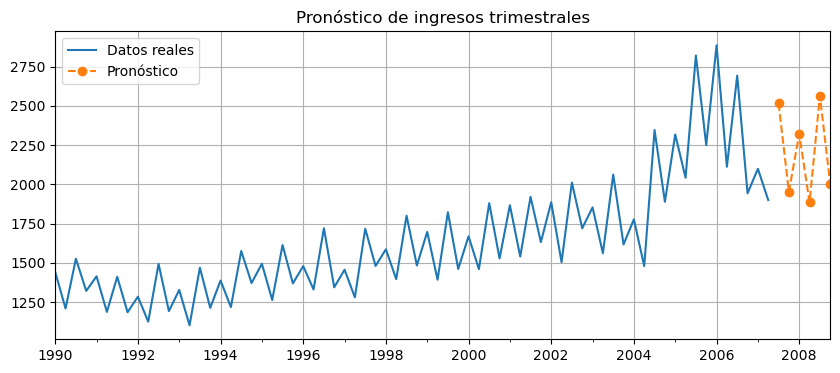

In [74]:
# Crear la serie trimestral
datos = [
    1441, 1209, 1526, 1321, 1414, 1187, 1411, 1185,
    1284, 1125, 1493, 1192, 1327, 1102, 1469, 1213,
    1387, 1218, 1575, 1371, 1494, 1263, 1613, 1369,
    1479, 1330, 1720, 1344, 1456, 1280, 1717, 1480,
    1586, 1396, 1800, 1483, 1697, 1392, 1822, 1461,
    1669, 1460, 1880, 1528, 1867, 1540, 1920, 1632,
    1886, 1504, 2011, 1720, 1853, 1561, 2062, 1617,
    1777, 1479, 2346, 1889, 2318, 2042, 2821, 2250,
    2886, 2112, 2693, 1943, 2099, 1900
]

# Crear índice de fechas trimestrales
fecha_inicio = pd.Period('1990Q1', freq='Q')
fechas = pd.period_range(start=fecha_inicio, periods=len(datos), freq='Q')

# Crear DataFrame
serie = pd.Series(datos, index=fechas)

# Modelo Holt-Winters aditivo con estacionalidad trimestral
modelo = ExponentialSmoothing(
    serie,
    trend="add",
    seasonal="add",
    seasonal_periods=4
).fit()

# Generar pronóstico para Q3 y Q4 de 2007 y todo 2008 (6 trimestres)
pronostico = modelo.forecast(6)

# Mostrar resultados
print("Pronósticos (millones de $):")
print(pronostico)

# Opcional: gráfico
serie.plot(label="Datos reales", figsize=(10,4))
pronostico.plot(label="Pronóstico", linestyle="--", marker="o")
plt.title("Pronóstico de ingresos trimestrales")
plt.legend()
plt.grid(True)
plt.show()

#### Comentario:

Para esta serie claramente estacional y con tendencia ascendente, hemos optado por aplicar un modelo de **Holt-Winters aditivo**. Esta técnica permite capturar tanto la tendencia lineal como la estacionalidad que se repite cada cuatro trimestres. Al revisar el comportamiento histórico de la serie, se observa un patrón claro en los trimestres de verano y una fuerte variabilidad en el tiempo. Esto descarta el uso de técnicas más simples como promedio móvil o suavizamiento exponencial simple. El modelo generado ha sido capaz de proyectar valores coherentes para los trimestres faltantes de 2007 y para todo 2008. Esta técnica es muy recomendable cuando trabajamos con series económicas o de ventas que repiten comportamiento cada año.
